In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


The exploratory analysis for the demographic data consists of exploring the three features of age, ethnicity, and income brackets for every zipcode in the dataset. The data is broken down by zip code then categorizing by the three features and reports the count for such bracket. The data was first cleaned then analyzed. The code for the analysis is also focused on zip codes and included functions where the input was a zip code and the output was a visualization of the distribution of ages or ethnicity or income for that zip code. 

In [2]:
demo_path = '/content/drive/MyDrive/Kinesso/US EDA/US Data Sources/zip_age_ethnicity_income_data/demo_data_'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# reads the U.S. demographic dataset into the DataFrame "demo" by iteratively concatenating files in groups of 20
demo = pd.DataFrame(columns = ['zip_code', 'age', 'ethnicity', 'income', 'count']) 
for i in range(19):
  start = (20 * i) + 1
  stop = start + 20
  demo_df_list = [pd.read_csv(demo_path + str(j) + '.csv').set_axis(['zip_code', 'age', 'ethnicity', 'income', 'count'], axis='columns') for j in range(start, stop)]
  demo_df_concat = pd.concat(demo_df_list)
  demo = pd.concat([demo, demo_df_concat])
  del demo_df_list
  del demo_df_concat

In [4]:
demo.head(20)

,zip_code,age,ethnicity,income,count
0,601,18-23,Hispanic,"$1,000 - $14,999",1
1,601,24-29,Hispanic,"$1,000 - $14,999",5
2,601,24-29,White,"$1,000 - $14,999",2
3,601,30-35,Hispanic,"$1,000 - $14,999",20
4,601,30-35,Hispanic,"$15,000 - $19,999",1
5,601,30-35,Hispanic,"$20,000 - $29,999",1
6,601,30-35,Hispanic,"$50,000 - $74,999",2
7,601,30-35,White,"$1,000 - $14,999",1
8,601,30-35,White,"$15,000 - $19,999",1
9,601,36-41,African American,"$20,000 - $29,999",1


Data Exploration

In [5]:
# Features/Variable names
demo.columns

Index(['zip_code', 'age', 'ethnicity', 'income', 'count'], dtype='object')

In [6]:
# Data Frame information (null, data type etc)
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7827660 entries, 0 to 20906
Data columns (total 5 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   zip_code   object
 1   age        object
 2   ethnicity  object
 3   income     object
 4   count      object
dtypes: object(5)
memory usage: 358.3+ MB


In [7]:
demo_60_65 = demo[demo['age']=='60-65']
demo_white_60_65 = demo_60_65[demo_60_65['ethnicity']=='White']

demo_white_60_65['income'].value_counts()

$50,000 - $74,999      36187
$40,000 - $49,999      34824
$30,000 - $39,999      34737
$20,000 - $29,999      34591
$1,000 - $14,999       34200
$75,000 - $99,999      33724
$15,000 - $19,999      33073
$100,000 - $124,999    31085
$150,000 - $174,999    24588
not_reported           24184
$125,000 - $149,999    23567
$175,000 - $199,999    17586
$200,000 - $249,999    14285
$250,000 or greater    11792
Name: income, dtype: int64

In [8]:
demo_60_65 = demo[demo['age']=='60-65']
demo_white_60_65 = demo_60_65[demo_60_65['ethnicity']=='African American']

demo_white_60_65['income'].value_counts()

$50,000 - $74,999      19622
$40,000 - $49,999      16056
$75,000 - $99,999      15246
$30,000 - $39,999      15062
$20,000 - $29,999      14209
$1,000 - $14,999       12177
$100,000 - $124,999    11731
$15,000 - $19,999      11254
not_reported            9378
$125,000 - $149,999     7570
$150,000 - $174,999     7014
$175,000 - $199,999     4505
$200,000 - $249,999     3938
$250,000 or greater     3612
Name: income, dtype: int64

In [9]:
demo['zip_code'].value_counts()

20906    566
11234    565
33647    565
8873     564
20874    564
        ... 
40231      1
5449       1
9898       1
83799      1
96673      1
Name: zip_code, Length: 39041, dtype: int64

In [10]:
#Returns a bargraph of the percentges of ethnicities in the given zipcode

def ethnicity_dist(zipcode):
  zip = demo[demo['zip_code'] == zipcode]
  am = (np.sum(zip[['count']].where(zip['ethnicity'] == 'African American'))/np.sum(zip['count']))*100
  his = (np.sum(zip[['count']].where(zip['ethnicity'] == 'Hispanic'))/np.sum(zip['count']))*100
  wh = (np.sum(zip[['count']].where(zip['ethnicity'] == 'White'))/np.sum(zip['count']))*100
  asi = (np.sum(zip[['count']].where(zip['ethnicity'] == 'Asian'))/np.sum(zip['count']))*100
  nr = (np.sum(zip[['count']].where(zip['ethnicity'] == 'not_reported'))/np.sum(zip['count']))*100

  ethnicity = {'African American':am, 'Hispanic':his, 'White':wh, 'Asian':asi, 'Not reported': nr}

  names = list(ethnicity.keys())
  values = list(ethnicity.values())
  plt.bar(0,values[0],tick_label=names[0])
  plt.bar(1,values[1],tick_label=names[1])
  plt.bar(2,values[2],tick_label=names[2])
  plt.bar(3, values[3], tick_label=names[3])
  plt.bar(4, values[4], tick_label=names[4])


  plt.xticks(range(0,5),names)
  plt.title('Ethnicity distribution for zipcode:' + str(zipcode))
  plt.show()
  return


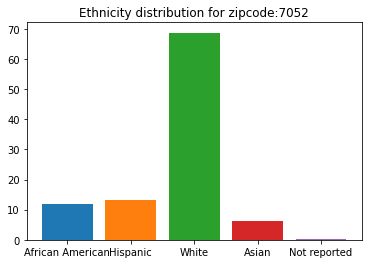

In [11]:
ethnicity_dist(7052)

In [12]:
#Returns a bargraph of the percentges of income bracket in the given zipcode

def income_dist(zipcode):
  zip = demo[demo['zip_code'] == zipcode]
  fifty_75 = (np.sum(zip[['count']].where(zip['income'] == '$50,000 - $74,999'))/np.sum(zip['count']))*100
  forty_50 = (np.sum(zip[['count']].where(zip['income'] == '$40,000 - $49,999'))/np.sum(zip['count']))*100
  twenty_30 = (np.sum(zip[['count']].where(zip['income'] == '$20,000 - $29,999'))/np.sum(zip['count']))*100
  thirty_40 = (np.sum(zip[['count']].where(zip['income'] == '$30,000 - $39,999'))/np.sum(zip['count']))*100
  one_15 = (np.sum(zip[['count']].where(zip['income'] == '$1,000 - $14,999'))/np.sum(zip['count']))*100
  seventyfive_100 = (np.sum(zip[['count']].where(zip['income'] == '$75,000 - $99,999'))/np.sum(zip['count']))*100
  fifteen_20 = (np.sum(zip[['count']].where(zip['income'] == '$15,000 - $19,999'))/np.sum(zip['count']))*100
  onehundred_125 = (np.sum(zip[['count']].where(zip['income'] == '$100,000 - $124,999'))/np.sum(zip['count']))*100
  not_reported = (np.sum(zip[['count']].where(zip['income'] == 'not_reported'))/np.sum(zip['count']))*100
  onetwentyfive_150 = (np.sum(zip[['count']].where(zip['income'] == '$125,000 - $149,999'))/np.sum(zip['count']))*100
  onefifty_175 = (np.sum(zip[['count']].where(zip['income'] == '$150,000 - $174,999'))/np.sum(zip['count']))*100
  oneseventyfive_200 = (np.sum(zip[['count']].where(zip['income'] == '$175,000 - $199,999'))/np.sum(zip['count']))*100
  twohundred_250 = (np.sum(zip[['count']].where(zip['income'] == '$200,000 - $249,999'))/np.sum(zip['count']))*100
  twofifty_more = (np.sum(zip[['count']].where(zip['income'] == '$250,000 or greater'))/np.sum(zip['count']))*100


  income = {'$1,000 - $14,999': one_15,  '$15,000 - $19,999':fifteen_20, '$20,000 - $29,999':twenty_30, '$30,000 - $39,999':thirty_40, 
            '$40,000 - $49,999':forty_50, '$50,000 - $74,999':fifty_75, '$75,000 - $99,999':seventyfive_100, '$100,000 - $124,999':onehundred_125,
            'not_reported': not_reported, '$125,000 - $149,999':onetwentyfive_150, '$150,000 - $174,999':onefifty_175, '$175,000 - $199,999':oneseventyfive_200, 
            '$200,000 - $249,999':twohundred_250, '$250,000 or greater':twofifty_more}

  names = list(income.keys())
  values = list(income.values())
  plt.bar(0,values[0],tick_label=names[0])
  plt.bar(1,values[1],tick_label=names[1])
  plt.bar(2,values[2],tick_label=names[2])
  plt.bar(3, values[3], tick_label=names[3])
  plt.bar(4, values[4], tick_label=names[4])
  plt.bar(5, values[5], tick_label=names[5])
  plt.bar(6, values[6], tick_label=names[6])
  plt.bar(7, values[7], tick_label=names[7])
  plt.bar(8, values[8], tick_label=names[8])
  plt.bar(9, values[9], tick_label=names[9])
  plt.bar(10, values[10], tick_label=names[10])
  plt.bar(11, values[11], tick_label=names[11])
  plt.bar(12, values[12], tick_label=names[12])
  plt.bar(13, values[13], tick_label=names[13])

  plt.xticks(range(0,14),names)
  plt.xticks(rotation=80)
  plt.title('Income distribution for zipcode:' + str(zipcode))
  plt.show()
  return

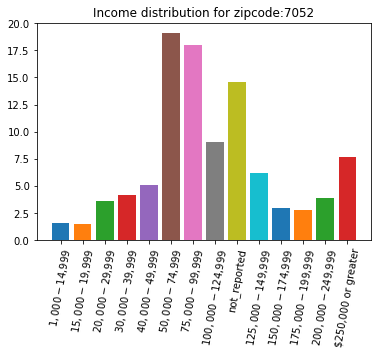

In [13]:
income_dist(7052)

In [14]:
#Returns a bargraph of the percentges of ages in the given zipcode

def age_dist(zipcode):
  zip = demo[demo['zip_code'] == zipcode]
  sixtysix_above = (np.sum(zip[['count']].where(zip['age'] == '66 and above'))/np.sum(zip['count']))*100
  fiftyfour_59 = (np.sum(zip[['count']].where(zip['age'] == '54-59'))/np.sum(zip['count']))*100
  sixty_65 = (np.sum(zip[['count']].where(zip['age'] == '60-65'))/np.sum(zip['count']))*100
  fortyeight_53 = (np.sum(zip[['count']].where(zip['age'] == '48-53'))/np.sum(zip['count']))*100
  nr = (np.sum(zip[['count']].where(zip['age'] == 'not_reported'))/np.sum(zip['count']))*100
  fortytwo_47 = (np.sum(zip[['count']].where(zip['age'] == '42-47'))/np.sum(zip['count']))*100
  thirtysix_41 = (np.sum(zip[['count']].where(zip['age'] == '36-41'))/np.sum(zip['count']))*100
  thirty_35 = (np.sum(zip[['count']].where(zip['age'] == '30-35'))/np.sum(zip['count']))*100
  twentyfour_29 = (np.sum(zip[['count']].where(zip['age'] == '24-29'))/np.sum(zip['count']))*100
  eighteen_23 = (np.sum(zip[['count']].where(zip['age'] == '18-23'))/np.sum(zip['count']))*100

  ages = {'18-23':eighteen_23, '24-29':twentyfour_29, '30-35':thirty_35, '36-41':thirtysix_41, '42-47': fortytwo_47, '48-53':fortyeight_53, 
          '54-59':fiftyfour_59, '60-65':sixty_65, '66 and above':sixtysix_above, 'not_reported':nr}

  names = list(ages.keys())
  values = list(ages.values())
  plt.bar(0,values[0],tick_label=names[0])
  plt.bar(1,values[1],tick_label=names[1])
  plt.bar(2,values[2],tick_label=names[2])
  plt.bar(3, values[3], tick_label=names[3])
  plt.bar(4, values[4], tick_label=names[4])
  plt.bar(5, values[5], tick_label=names[5])
  plt.bar(6, values[6], tick_label=names[6])
  plt.bar(7, values[7], tick_label=names[7])
  plt.bar(8, values[8], tick_label=names[8])
  plt.bar(9, values[9], tick_label=names[9])


  plt.xticks(range(0,10), names)
  plt.xticks(rotation=80)
  plt.title('Age distribution in zipcode:' + str(zipcode))
  plt.show()
  return

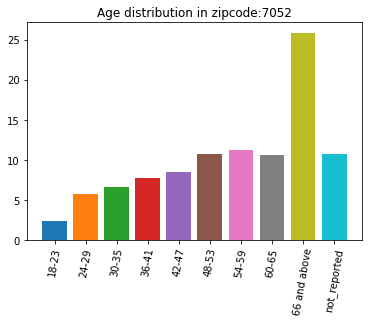

In [15]:
age_dist(7052)